In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import numpy as np

# Raw values for 'Animal', 'CSCG', 'Hebbian-RNN'
animal_values = [0.07591265297852602, 0.039987456611710555, 0.0636189559724969, 0.037750875669049645, 0.06877763345032822,
                 0.04962032882298326, 0.08051751789029703, 0.0851175355650337, 0.07882158152048885, 0.05570816614751591,
                 0.047213405975605645]
CSCG_values = [0.01124321, 0.01076764, 0.01237898, 0.01122767, 0.01144429, 0.01094654,
               0.01709019, 0.01078433, 0.01121301, 0.01116816, 0.01116733, 0.01139205,
               0.01153114, 0.01067931, 0.01644526, 0.01095712, 0.01107633, 0.01122475,
               0.01123311, 0.01106954]
Hebbian_RNN_values = [0.008234771708415831, -0.008805470924869357, -0.016793775791593968,
                      -0.018682891599023164, -0.011201343109121185, -0.02118404899917737,
                      -0.020487303977211976, -0.018575775466465196, -0.021975870577615193,
                      0.0034879937826388743]
LSTM_values = [0.3998226146772882,
 0.4049226857740502,
 0.47090996313553785,
 0.3281264501728665,
 0.3739589049583544,
 0.4305966131621619,
 0.39889681867075666,
 0.45996414986275297,
 0.497127996345118,
 0.4489253570404211] ## online

Transformer_values = [0.50278039, 0.49418243, 0.50850751, 0.46868897, 0.49127309, 0.5215042,
 0.50318885, 0.48969504, 0.49660975, 0.50995818]

Vanilla_RNN_ReLU = [0.36232775, 0.40378101, 0.36907639, 0.43682382, 0.40519611,
       0.45322131, 0.40519663, 0.35112898, 0.44199089, 0.33987945]

Vanilla_RNN_Softmax = [0.02741914, 0.06313697, 0.03279823, 0.02199352, 0.08860925,
       0.03230627, 0.0306104 , 0.02292516, 0.04203958, 0.02736702,
       0.02948938, 0.04636457, 0.02562183, 0.06242836, 0.03340852,
       0.0316519 , 0.04382433, 0.03451653, 0.02845209, 0.05027237,
       0.03126598, 0.04228719, 0.03997411, 0.03031752, 0.03443493,
       0.04429395, 0.04298155, 0.03785387, 0.0338097 , 0.03407815,
       0.02404666, 0.0594176 , 0.02085176, 0.04461761, 0.02727575,
       0.0393253 , 0.02488522, 0.04803677, 0.03047051, 0.04052144,
       0.03975911, 0.02952771]
Vanilla_RNN_Polynomial = [0.03277494, 0.04674615, 0.04234426, 0.03389724, 0.02905386,
       0.03375014, 0.02635642, 0.02715806, 0.0357927 , 0.02338638,
       0.02771884, 0.0290008 , 0.03191504, 0.03395377, 0.02568105,
       0.0276187 , 0.02977923, 0.03891252, 0.03659744, 0.0264868 ,
       0.03084494, 0.03590577, 0.02699788, 0.0360434 , 0.03233703,
       0.02908185, 0.03131645, 0.03354202, 0.03714075, 0.03403884,
       0.02434686, 0.05099721, 0.04303191, 0.0265286 , 0.0354147 ,
       0.02805073, 0.03457009, 0.03891381, 0.02843768, 0.02356205,
       0.03343306, 0.02952824, 0.04625728, 0.03585127, 0.03066686,
       0.02778468, 0.02540682]

Vanilla_RNN_Sigmoid = [0.42705144, 0.19785494, 0.1958311 , 0.27576551, 0.81954483,
       0.2841871 , 0.62480322, 0.25572008, 0.99803062, 0.99897323,
       0.26440759, 0.80034655]

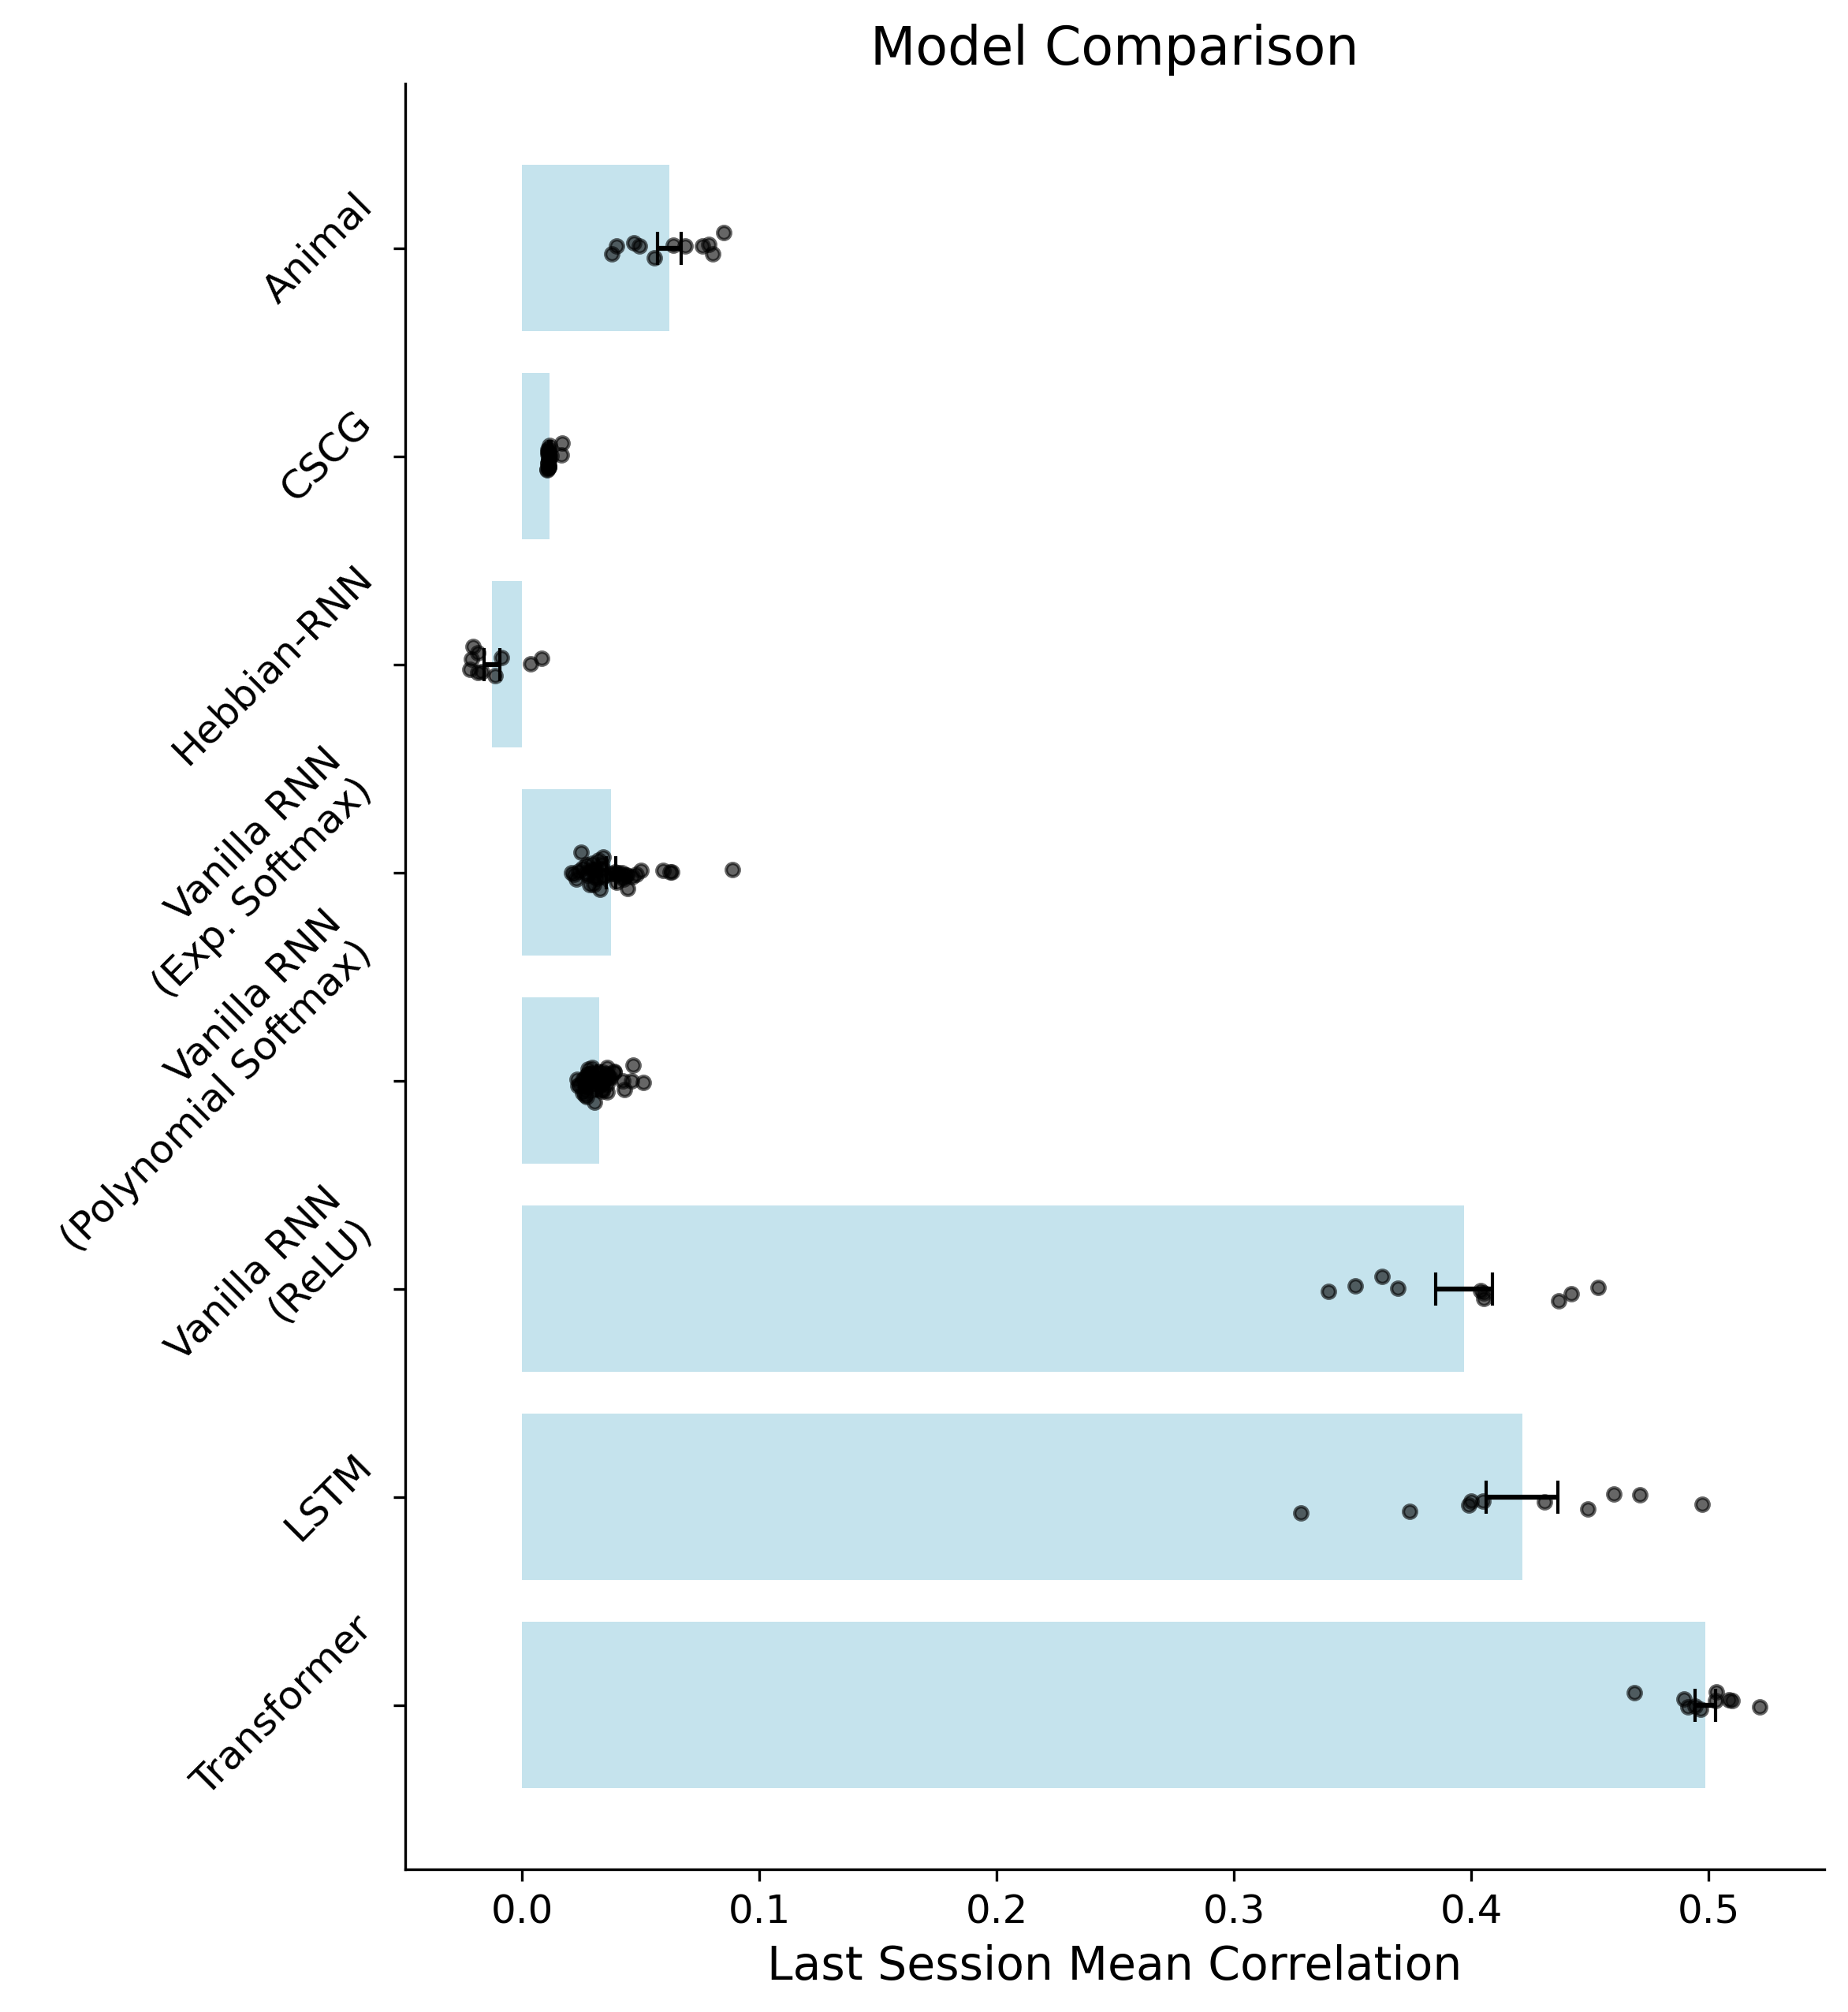

In [4]:
models = ['Transformer', 'LSTM', 'Vanilla RNN\n(ReLU)', 'Vanilla RNN\n(Polynomial Softmax)', 'Vanilla RNN\n(Exp. Softmax)', 'Hebbian-RNN', 'CSCG', 'Animal']
data = [Transformer_values, LSTM_values, Vanilla_RNN_ReLU, Vanilla_RNN_Polynomial, Vanilla_RNN_Softmax, Hebbian_RNN_values, CSCG_values, animal_values]

fig, ax = plt.subplots(figsize=(12, 10), dpi=300)

means = [np.mean(values) for values in data]
errors = [np.std(values) / np.sqrt(len(values)) for values in data]

y_pos = np.arange(len(models))

bars = ax.barh(y_pos, means, xerr=errors, align='center', alpha=0.7, capsize=5, color='lightblue', linewidth=0)

for i, values in enumerate(data):
    y = np.random.normal(i, 0.04, size=len(values))
    ax.plot(values, y, 'o', color='black', markersize=4, alpha=0.6)

ax.set_yticks(y_pos)
ax.set_yticklabels([])

label_offset = 0.06
for i, model in enumerate(models):
    ax.text(-label_offset, i, model, ha='right', va='center', rotation=45, fontsize=12)

ax.set_xlabel('Last Session Mean Correlation', fontsize=14)
ax.set_title('Model Comparison', fontsize=16)
ax.tick_params(axis='both', labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplots_adjust(left=0.4)

plt.savefig('final_corr_bar.pdf', format='pdf',dpi=600, bbox_inches='tight')
plt.show()

In [5]:
import numpy as np
from scipy import stats
from IPython.display import display, HTML

def perform_statistical_tests(animal_values, other_models_data, model_names):
    results = []
    animal_mean = np.mean(animal_values)
    for model_data, model_name in zip(other_models_data, model_names):
        model_mean = np.mean(model_data)
        t_stat, p_value = stats.ttest_ind(animal_values, model_data)
        effect_size = (animal_mean - model_mean) / np.sqrt((np.std(animal_values, ddof=1)**2 + np.std(model_data, ddof=1)**2) / 2)
        results.append({
            'model': model_name,
            't_statistic': t_stat,
            'p_value': p_value,
            'effect_size': effect_size,
            'N_animal': len(animal_values),
            'N_model': len(model_data),
            'animal_mean': animal_mean,
            'model_mean': model_mean
        })
    return results

def print_results(results, alpha=0.05, corrected=False):
    print(f"{'Bonferroni-corrected ' if corrected else ''}Statistical Test Results (α = {alpha}):")
    print("-" * 100)
    print(f"{'Model':<20} {'t-statistic':>12} {'p-value':>12} {'Effect Size':>12} {'N (Animal)':>12} {'N (Model)':>12} {'Animal Mean':>12} {'Model Mean':>12}")
    print("-" * 100)
    
    for result in results:
        model = result['model']
        t_stat = result['t_statistic']
        p_value = result['p_value']
        effect_size = result['effect_size']
        n_animal = result['N_animal']
        n_model = result['N_model']
        animal_mean = result['animal_mean']
        model_mean = result['model_mean']
        
        print(f"{model:<20} {t_stat:>12.4f} {p_value:>12.4e} {effect_size:>12.4f} {n_animal:>12} {n_model:>12} {animal_mean:>12.4f} {model_mean:>12.4f}")
    print("-" * 100)

def print_conclusion(results, corrected=False):
    conclusion = "<h3>Conclusions:</h3>"
    conclusion += f"<h4>{'With' if corrected else 'Without'} Bonferroni correction:</h4>"
    conclusion += "<ul>"
    
    for result in results:
        comparison = "higher" if result['animal_mean'] > result['model_mean'] else "lower"
        p_value = result['p_value']
        alpha = 0.05 / len(results) if corrected else 0.05
        
        if p_value < alpha:
            conclusion += f"<li>There is a <strong>significant difference</strong> between Animal and {result['model']} (p = {p_value:.4e}).<br>"
            conclusion += f"Animal's final mean correlation is {comparison} (Animal: {result['animal_mean']:.4f}, {result['model']}: {result['model_mean']:.4f}).</li>"
        else:
            conclusion += f"<li>There is no significant difference between Animal and {result['model']} (p = {p_value:.4e}).<br>"
            conclusion += f"Animal's final mean correlation is {comparison}, but not significantly (Animal: {result['animal_mean']:.4f}, {result['model']}: {result['model_mean']:.4f}).</li>"
        
        conclusion += "<br>"  # Add an extra line break between items
    
    conclusion += "</ul>"
    display(HTML(conclusion))

# Perform the statistical tests
results = perform_statistical_tests(animal_values, [Transformer_values, LSTM_values, Vanilla_RNN_ReLU, Vanilla_RNN_Polynomial, Vanilla_RNN_Softmax, Hebbian_RNN_values, CSCG_values], 
                                    ['Transformer', 'LSTM', 'Vanilla RNN (ReLU)', 'Vanilla RNN (Poly)', 'Vanilla RNN (Exp)', 'Hebbian-RNN', 'CSCG'])

# Print results without correction
print_results(results)

print("\n")

# Print results with Bonferroni correction
print_results(results, corrected=True)

# Print conclusions without correction
print_conclusion(results)

# Print conclusions with Bonferroni correction
print_conclusion(results, corrected=True)

Statistical Test Results (α = 0.05):
----------------------------------------------------------------------------------------------------
Model                 t-statistic      p-value  Effect Size   N (Animal)    N (Model)  Animal Mean   Model Mean
----------------------------------------------------------------------------------------------------
Transformer              -63.3378   1.4284e-23     -27.7981           11           10       0.0621       0.4986
LSTM                     -22.4002   4.0195e-15      -9.5805           11           10       0.0621       0.4213
Vanilla RNN (ReLU)       -25.4751   3.7620e-16     -10.9261           11           10       0.0621       0.3969
Vanilla RNN (Poly)         9.6576   1.5915e-13       2.3100           11           47       0.0621       0.0325
Vanilla RNN (Exp)          5.2092   3.4415e-06       1.6216           11           42       0.0621       0.0375
Hebbian-RNN               11.9172   2.9122e-10       5.2662           11           10    